## Detect fake profiles in online social networks using Random Forest

In [7]:
import sys
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import gender_guesser.detector as gender
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from  sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold, train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline 

###### function for reading dataset from csv files

In [8]:

def read_datasets():
    """ Reads users profile from csv files """
    genuine_users = pd.read_csv("data/users.csv")
    fake_users = pd.read_csv("data/fusers.csv")
    # print genuine_users.columns
    # print genuine_users.describe()
    #print fake_users.describe()
    x=pd.concat([genuine_users,fake_users])   
    y=len(fake_users)*[0] + len(genuine_users)*[1]
    return x,y
    

###### function for predicting sex using name of person

In [193]:
def predict_sex(name):
    sex_predictor=gender.Detector(case_sensitiv
e=False)
first_name=name.str.split('').str.get(0)
sex=first_name.apply(sex_predictor.get_gender)
sex_dict={'female':-2,'mostly_female':-1,'unknown':0,'mostly_mal
e':1,'male':2}
sex_code=sex.map(sex_dict).astype(int)
returnsex_code


###### function for feature engineering

In [32]:
def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))   
    lang_dict = { name : i for i, name in lang_list }             
    x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)    
    x.loc[:,'sex_code']=predict_sex(x['name'])
    feature_columns_to_use = ['statuses_count','followers_count','friends_count','favourites_count','listed_count','sex_code','lang_code']
    x=x.loc[:,feature_columns_to_use]
    return x

###### function for ploting learning curve

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

###### function for plotting confusion matrix

In [34]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###### function for plotting ROC curve

In [35]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    print( "False Positive rate: ",false_positive_rate)
    print( "True Positive rate: ",true_positive_rate)


    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

###### Function for training data using Random Forest

In [36]:
def train(X_train,y_train,X_test):
    """ Trains and predicts dataset with a Random Forest classifier """
    
    clf=RandomForestClassifier(n_estimators=40,oob_score=True)
    clf.fit(X_train,y_train)
    print("The best classifier is: ",clf)
    # Estimate score
    scores = cross_validation.cross_val_score(clf, X_train,y_train, cv=5)
    print(scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title = 'Learning Curves (Random Forest)'
    plot_learning_curve(clf, title, X_train, y_train, cv=5)
    plt.show()
    # Predict 
    y_pred = clf.predict(X_test)
    return y_test,y_pred

In [196]:
print( "reading datasets.....\n")
x,y=read_datasets()
x.describe()

reading datasets.....



,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,2.818000e+03,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,1728.0,8.0,721.0,2760.0,489.0,1069.000000,0.0,0.0
mean,5.374889e+08,1672.198368,371.105039,395.363023,234.541164,2.818666,1.0,1.0,1.0,1.0,1.0,1478.391020,NaN,NaN
std,2.977005e+08,4884.669157,8022.631339,465.694322,1445.847248,23.480430,0.0,0.0,0.0,0.0,0.0,8108.211889,NaN,NaN
min,3.610511e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,3.620867e+08,35.000000,17.000000,168.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
50%,6.162253e+08,77.000000,26.000000,306.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
75%,6.177673e+08,1087.750000,111.000000,519.000000,37.000000,1.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
max,1.391998e+09,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,1.0,1.0,1.0,1.0,1.0,36000.000000,NaN,NaN


In [194]:
print ("extracting featues.....\n")
x=extract_features(x)
print( x.columns)
print (x.describe())

extracting featues.....

0                Davide
1                Simone
2                tacone
3              alesaura
4                Angelo
5              CRISTIAN
6                  tmpx
7                  igor
8                 Marco
9               Antonio
10           alessandra
11              Mackley
12             Pasquale
13              Giacomo
14             decumano
15            Francesco
16                Erica
17              Flavio®
18           _Annalisa_
19            Valentina
20            Francesco
21               fausta
22      sognidispersivi
23               Duilio
24               Felice
25              ladegri
26               Andrea
27                 axel
28             Fabrizio
29            Salvatore
             ...       
1307            Dolores
1308             Louann
1309          Anneliese
1310               Ming
1311           Estrella
1312              Jewel
1313              Kaley
1314            Maynard
1315           Adelaide
1316           

In [26]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)

In [27]:
#print "training datasets.......\n"
y_test,y_pred = train(X_train,y_train,X_test)

ValueError: could not convert string to float: 'INT'

In [18]:
print 'Classification Accuracy on Test dataset: ' ,accuracy_score(y_test, y_pred)

SyntaxError: invalid syntax (<ipython-input-18-25749e6e679e>, line 1)

In [19]:
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)

NameError: name 'y_test' is not defined

In [20]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

NameError: name 'cm' is not defined

In [21]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

NameError: name 'y_test' is not defined

False Positive rate:  [ 0.          0.01119403  1.        ]
True Positive rate:  [ 0.          0.89864865  1.        ]


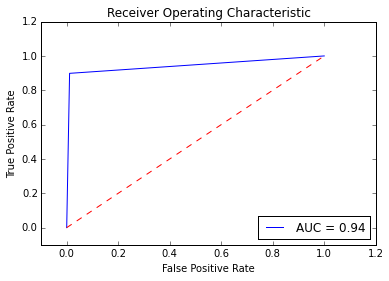

In [73]:
 plot_roc_curve(y_test, y_pred)